HR Analytics

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
data=pd.read_csv("HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.shape

(1470, 35)

In [8]:
# Checking null values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

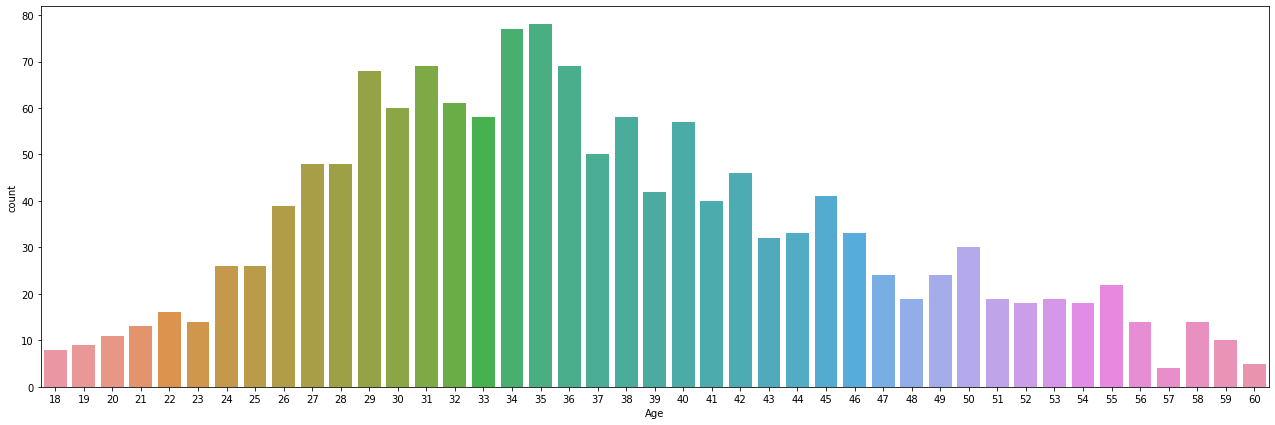

In [12]:
# Data Visualization

ax=data['Age'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(data['Age'])

No     1233
Yes     237
Name: Attrition, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

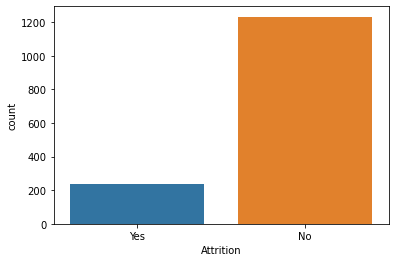

In [13]:
# Employee age is from 18 to 60 and max age range of employee is from 28 to 38

ax=data['Attrition'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(data['Attrition'])

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

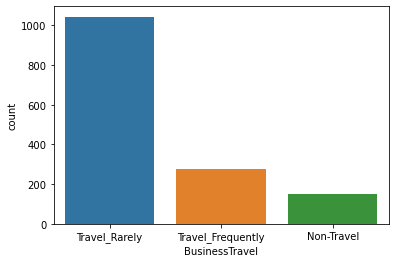

In [14]:
ax=data['BusinessTravel'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(data['BusinessTravel'])

691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate', ylabel='count'>

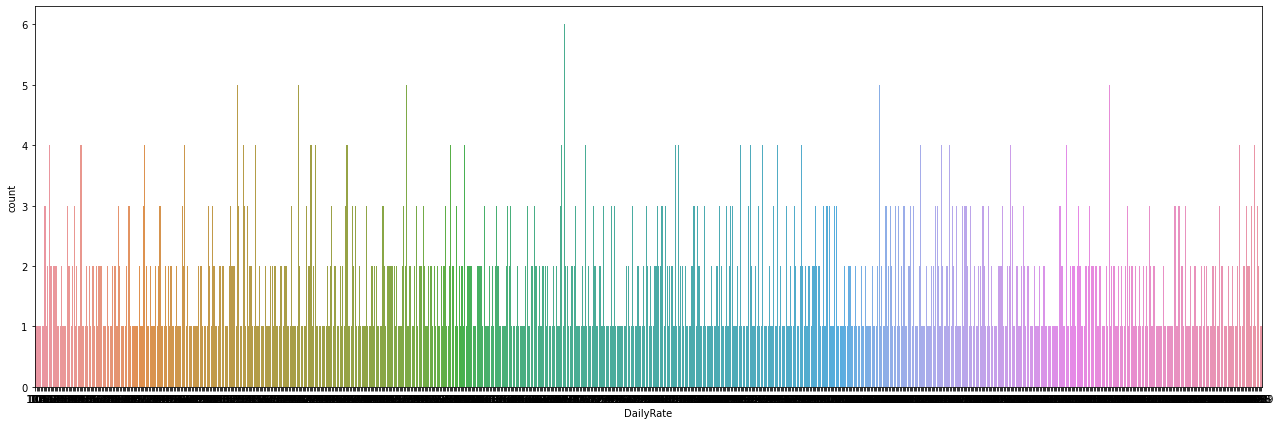

In [15]:
ax=data['DailyRate'].value_counts()
print(ax)
plt.figure(figsize=(22,7))
sns.countplot(data['DailyRate'])

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

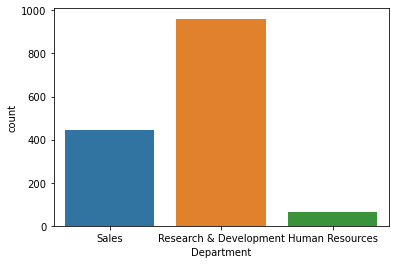

In [17]:
#It can be seen that it is scattered 

ax=data['Department'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(data['Department'])

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

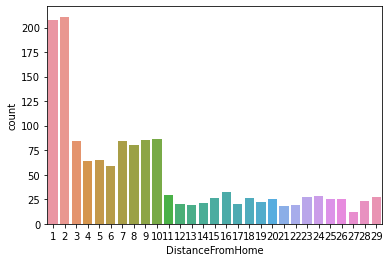

In [18]:
ax=data['DistanceFromHome'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(data['DistanceFromHome'])

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

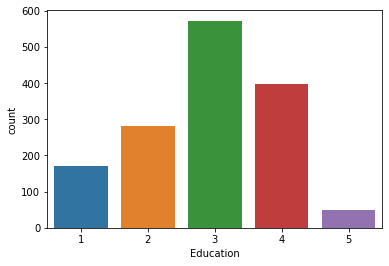

In [20]:
ax=data['Education'].value_counts()
print(ax)
#plt.figure(figsize=(22,7))
sns.countplot(data['Education'])

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EducationField', ylabel='count'>

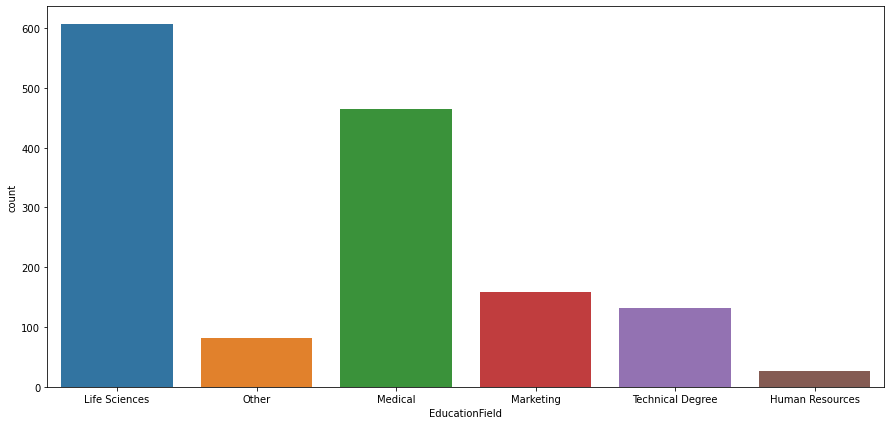

In [21]:
ax=data['EducationField'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(data['EducationField'])

1    1470
Name: EmployeeCount, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

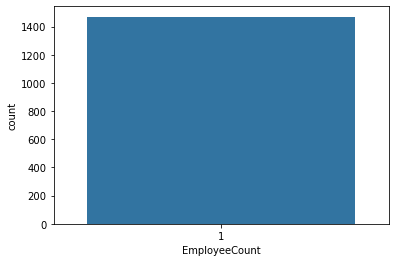

In [22]:
ax=data['EmployeeCount'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['EmployeeCount'])

In [24]:
# We drop this column since there is only one type present

data.drop(["EmployeeCount"],axis=1,inplace=True)

2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EmployeeNumber', ylabel='count'>

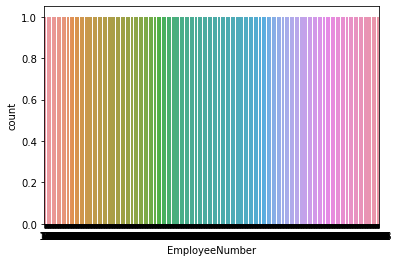

In [25]:
ax=data['EmployeeNumber'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['EmployeeNumber'])

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

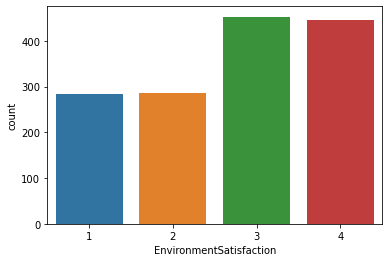

In [27]:
ax=data['EnvironmentSatisfaction'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['EnvironmentSatisfaction'])

Male      882
Female    588
Name: Gender, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

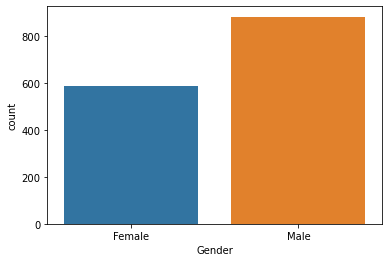

In [29]:
ax=data['Gender'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['Gender'])

66    29
42    28
98    28
48    28
84    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

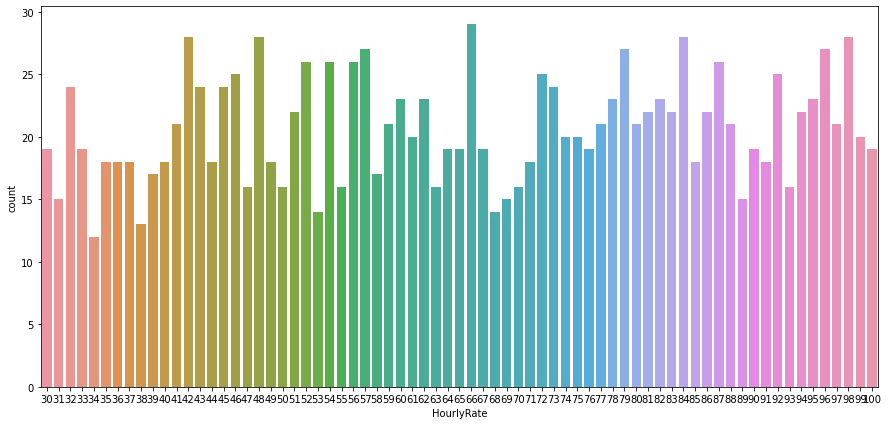

In [30]:
ax=data['HourlyRate'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(data['HourlyRate'])

In [ ]:
#Hourly rate is from 30 - 100

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

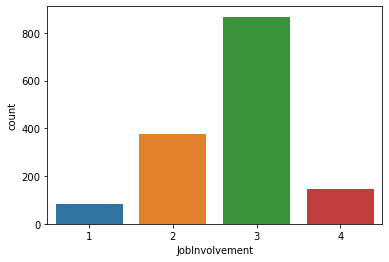

In [32]:

ax=data['JobInvolvement'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['JobInvolvement'])

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

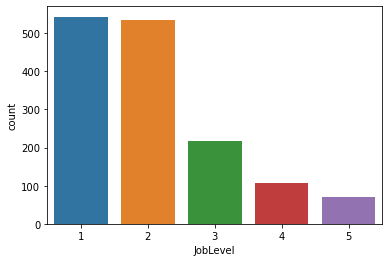

In [34]:
ax=data['JobLevel'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['JobLevel'])

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobRole', ylabel='count'>

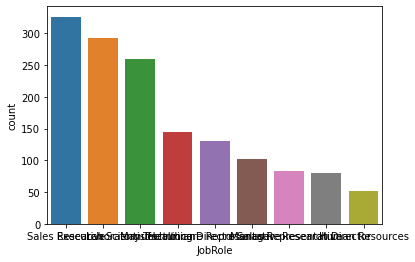

In [35]:
ax=data['JobRole'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['JobRole'])

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

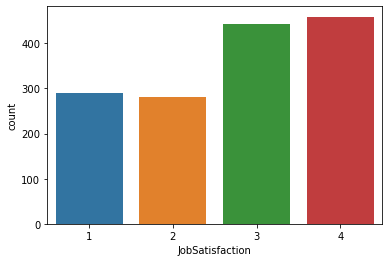

In [37]:
ax=data['JobSatisfaction'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['JobSatisfaction'])

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

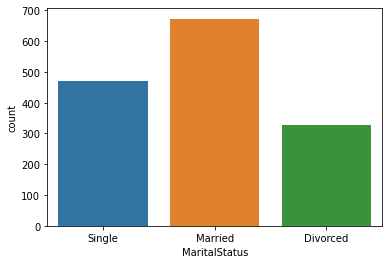

In [38]:
ax=data['MaritalStatus'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['MaritalStatus'])

2342     4
5562     3
2741     3
2451     3
2610     3
        ..
5381     1
13577    1
12965    1
3339     1
14336    1
Name: MonthlyIncome, Length: 1349, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

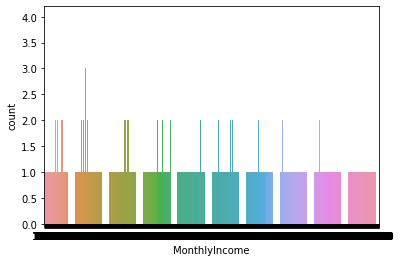

In [40]:
ax=data['MonthlyIncome'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['MonthlyIncome'])

4223     3
9150     3
6670     2
7324     2
4658     2
        ..
11585    1
15682    1
3395     1
9541     1
8192     1
Name: MonthlyRate, Length: 1427, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyRate', ylabel='count'>

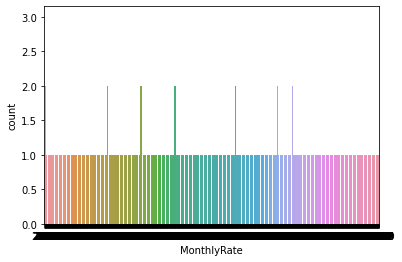

In [41]:
ax=data['MonthlyRate'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(data['MonthlyRate'])

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

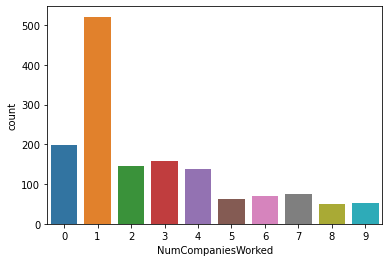

In [42]:
ax=data['NumCompaniesWorked'].value_counts()
print(ax)

sns.countplot(data['NumCompaniesWorked'])

Y    1470
Name: Over18, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Over18', ylabel='count'>

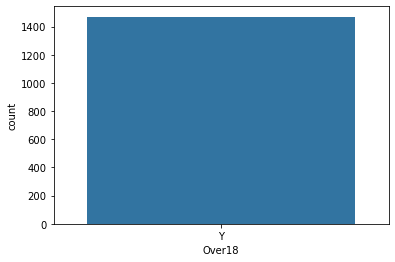

In [43]:
ax=data['Over18'].value_counts()
print(ax)

sns.countplot(data['Over18'])

In [44]:
data.drop(["Over18"],axis=1,inplace=True)

No     1054
Yes     416
Name: OverTime, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverTime', ylabel='count'>

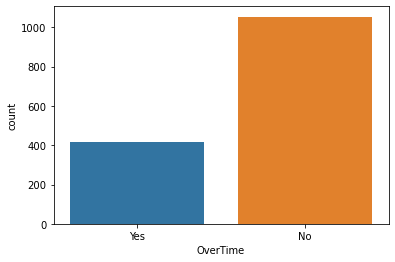

In [46]:
ax=data['OverTime'].value_counts()
print(ax)

sns.countplot(data['OverTime'])

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

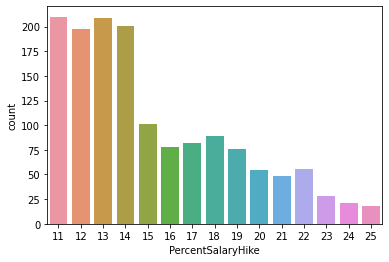

In [47]:
ax=data['PercentSalaryHike'].value_counts()
print(ax)

sns.countplot(data['PercentSalaryHike'])

3    1244
4     226
Name: PerformanceRating, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

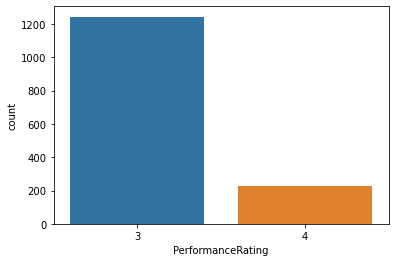

In [48]:
ax=data['PerformanceRating'].value_counts()
print(ax)

sns.countplot(data['PerformanceRating'])

80    1470
Name: StandardHours, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StandardHours', ylabel='count'>

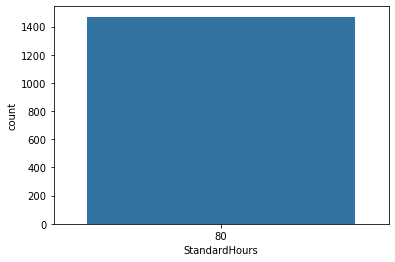

In [50]:
ax=data['StandardHours'].value_counts()
print(ax)

sns.countplot(data['StandardHours'])


In [52]:
data.drop(["StandardHours"],axis=1,inplace=True)

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

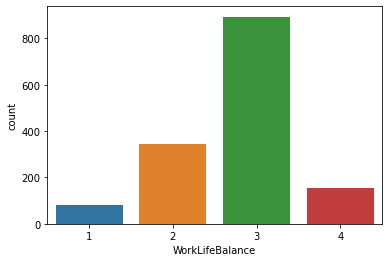

In [54]:
ax=data['WorkLifeBalance'].value_counts()
print(ax)

sns.countplot(data['WorkLifeBalance'])



5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

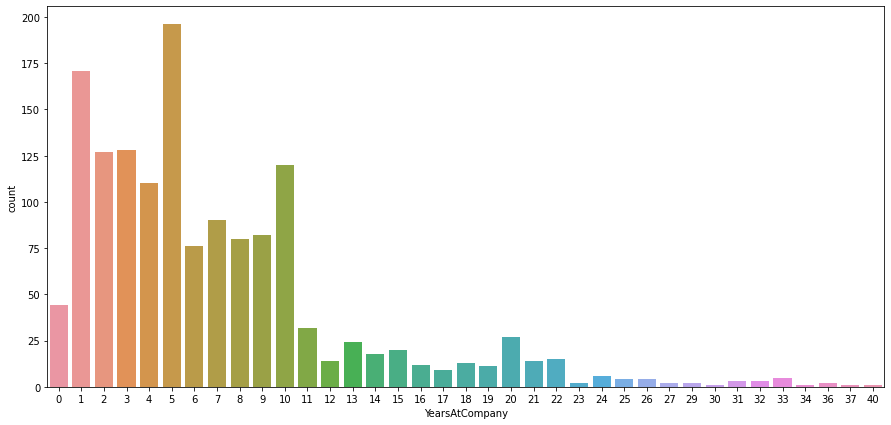

In [55]:
ax=data['YearsAtCompany'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(data['YearsAtCompany'])

In [57]:
# Encoding Data

lencoder=LabelEncoder()
data['Attrition']=lencoder.fit_transform(data['Attrition'])
data['BusinessTravel']=lencoder.fit_transform(data['BusinessTravel'])
data['Department']=lencoder.fit_transform(data['Department'])
data['EducationField']=lencoder.fit_transform(data['EducationField'])
data['Gender']=lencoder.fit_transform(data['Gender'])
data['JobRole']=lencoder.fit_transform(data['JobRole'])
data['MaritalStatus']=lencoder.fit_transform(data['MaritalStatus'])
data['OverTime']=lencoder.fit_transform(data['OverTime'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


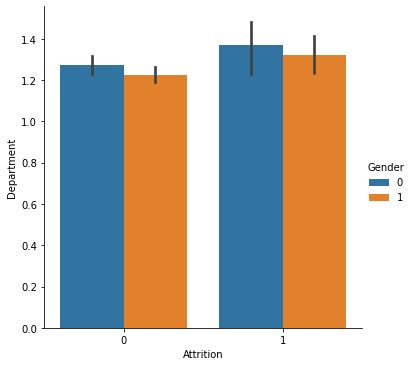

In [60]:
p=sns.catplot(x='Attrition',y='Department',hue='Gender',data=data,kind='bar')
plt.show()

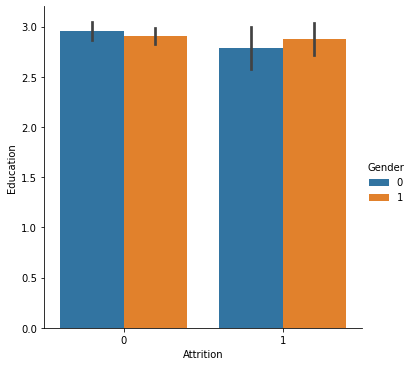

In [61]:
p=sns.catplot(x='Attrition',y='Education',hue='Gender',data=data,kind='bar')
plt.show()

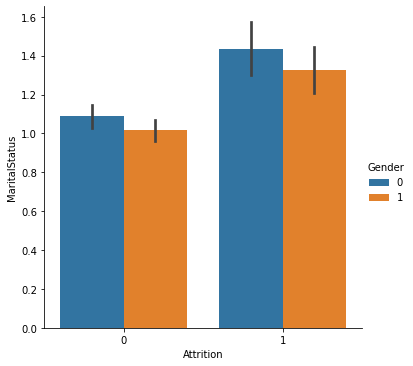

In [62]:
p=sns.catplot(x='Attrition',y='MaritalStatus',hue='Gender',data=data,kind='bar')
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>],
       [<AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>],
       [<AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<Axes

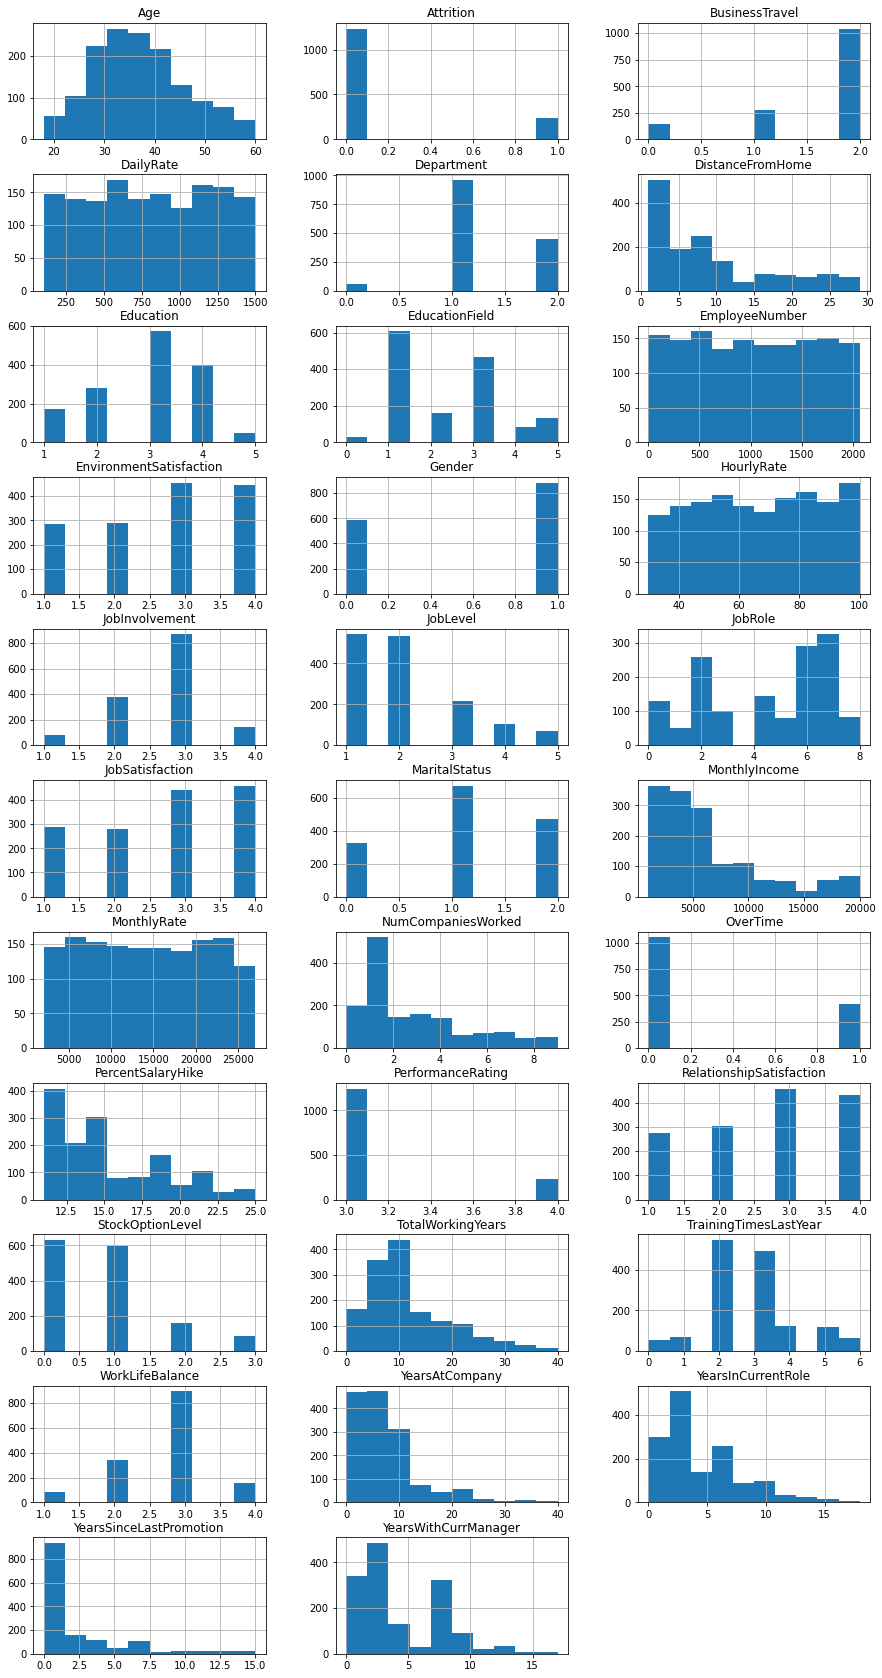

In [63]:
data.hist(figsize=(15,30),layout=(11,3))

In [65]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

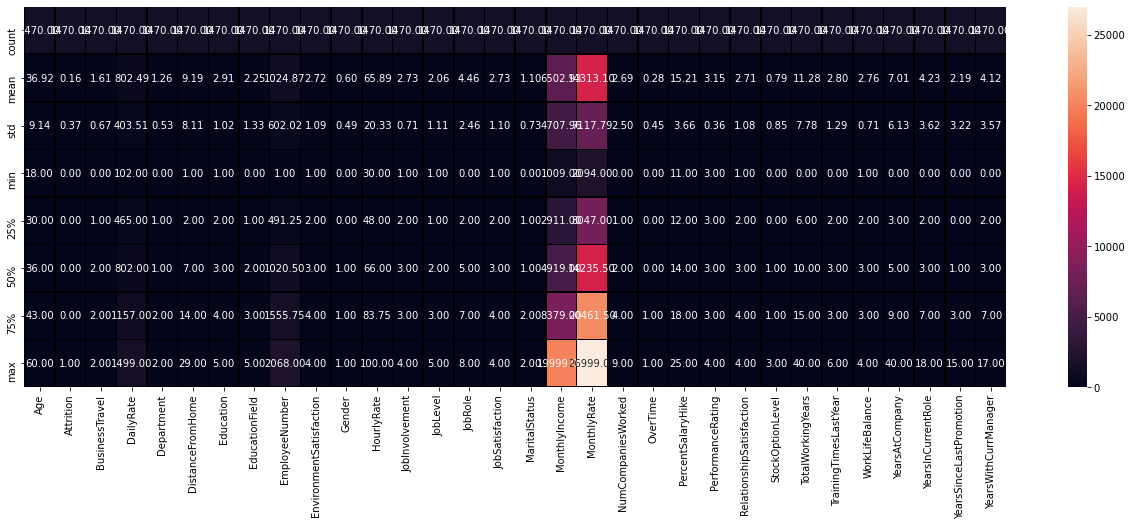

In [66]:
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

In [68]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


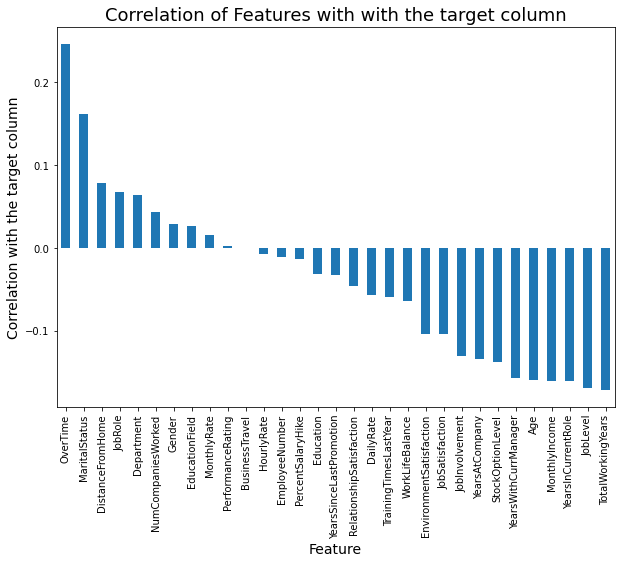

In [71]:
plt.figure(figsize=(10,7))
data.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()

In [72]:
data.drop(["BusinessTravel"],axis=1,inplace=True)

In [75]:
# Removing outliers

data_1=data.copy()
data_1.drop("Attrition",axis=1,inplace=True)

In [76]:
data_1

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,2,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,5,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,7,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,2061,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,2062,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,2064,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,2065,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [77]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
def calc_vif(dfx):
    vif=pd.DataFrame()
    vif['variables']=dfx.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    return(vif)

In [80]:
calc_vif(data_1)

,variables,VIF_Factor
0,Age,33.264759
1,DailyRate,4.977640
2,Department,12.973655
3,DistanceFromHome,2.320296
4,Education,9.483556
5,EducationField,3.860220
6,EmployeeNumber,3.927929
7,EnvironmentSatisfaction,7.114278
8,Gender,2.510378
9,HourlyRate,11.238199


In [81]:
data_1.drop(["PerformanceRating"],axis=1,inplace=True)

In [82]:
data_1

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,94,...,11,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,2,3,1,61,...,23,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,4,1,92,...,15,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,5,4,0,56,...,11,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,7,1,1,40,...,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,2061,3,1,41,...,17,3,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,2062,4,1,42,...,15,1,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,2064,2,1,87,...,20,2,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,2065,4,1,63,...,14,4,0,17,3,2,9,6,0,8


In [83]:
# Skewness

data.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

<AxesSubplot:>

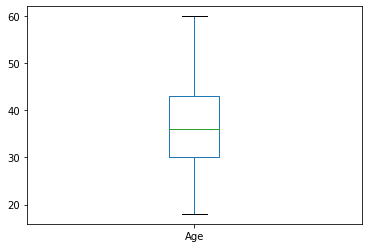

In [84]:
# there are few which fall outside -0.5 to +0.5

data['Age'].plot.box()

<AxesSubplot:>

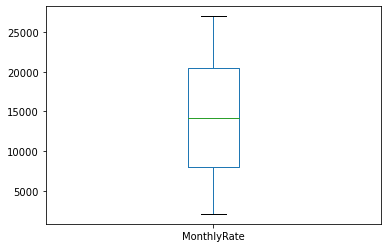

In [86]:
data['MonthlyRate'].plot.box()

In [88]:
# Outlier removal

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [90]:
data_new=data[(z<3).all(axis=1)]
data_new

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,7,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,2061,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,3,2062,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,1,2064,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,3,2065,4,1,...,3,4,0,17,3,2,9,6,0,8


In [92]:
data_new.shape

(1387, 31)

In [93]:
percentage_loss=((1470-1387)/1470)*100
print(percentage_loss)

5.646258503401361


In [98]:
data_1.columns

Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [99]:
data_new.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [101]:
feature=data_new.drop("Attrition",axis=1)
target=data_new["Attrition"]

In [102]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.54761905, 0.71633238, 1.        , ..., 0.26666667, 0.        ,
        0.35714286],
       [0.73809524, 0.12679083, 0.5       , ..., 0.46666667, 0.09090909,
        0.5       ],
       [0.45238095, 0.91045845, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03796562, 0.5       , ..., 0.13333333, 0.        ,
        0.21428571],
       [0.73809524, 0.65974212, 1.        , ..., 0.4       , 0.        ,
        0.57142857],
       [0.38095238, 0.37679083, 0.5       , ..., 0.2       , 0.09090909,
        0.14285714]])

In [104]:
y=target
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [105]:
# Logistic Regression

lr=LogisticRegression()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    lr.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 50 The model performs very well
At random state:- 50
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 70 The model performs very well
At random state:- 70
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 85 The model performs very well
At random state:- 85
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 224 The model performs very well
At random state:- 224
Training r2_score is:- 87.10550045085664
Testing r2_score is:- 87.05035971223022
At random state 479 The model performs very well
At random state:- 479
Training r2_score is:- 87.37601442741209
Testing r2_score is:- 87.41007194244604
At random state 501 The model performs very well
At random state:- 501
Training r2_score is:- 87.8268710550045
Testing r2_score is:- 87.76978417266187
At random state 514 The model performs very well
At random state:- 514
Training r2_score is:- 8

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.20)

In [107]:
# Cross validation for logistic regression

from sklearn.model_selection import cross_val_score
pred_lr = lr.predict(x_test)

lrcs= accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lrscore = cross_val_score(lr,x,y,cv=j)
    lrc = lrscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lrc*100 )
    print("accuracy_score is :-",lrcs*100)

At cv:- 2
Cross validation score is:- 86.6612814019154
accuracy_score is :- 88.12949640287769
At cv:- 3
Cross validation score is:- 86.80541920282741
accuracy_score is :- 88.12949640287769
At cv:- 4
Cross validation score is:- 86.44554480185238
accuracy_score is :- 88.12949640287769
At cv:- 5
Cross validation score is:- 87.02179050983041
accuracy_score is :- 88.12949640287769
At cv:- 6
Cross validation score is:- 86.87677265263471
accuracy_score is :- 88.12949640287769
At cv:- 7
Cross validation score is:- 86.94808820436961
accuracy_score is :- 88.12949640287769
At cv:- 8
Cross validation score is:- 86.73177861936084
accuracy_score is :- 88.12949640287769
At cv:- 9
Cross validation score is:- 86.80351906158357
accuracy_score is :- 88.12949640287769


In [108]:
mnb=MultinomialNB()
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    mnb.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 31 The model performs very well
At random state:- 31
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 71 The model performs very well
At random state:- 71
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 82 The model performs very well
At random state:- 82
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 90 The model performs very well
At random state:- 90
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 127 The model performs very well
At random state:- 127
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 187 The model performs very well
At random state:- 187
Training score is:- 83.49864743011722
Testing score is:- 83.45323741007195
At random state 188 The model performs very well
At random state:- 188
Training score is:- 83.49864743011722
Testing score is:- 83.4

In [109]:
from sklearn.model_selection import cross_val_score
pred_mnb = mnb.predict(x_test)

mnbcs= accuracy_score(y_test,pred_mnb)
for j in range(2,10):
    mnbscore = cross_val_score(mnb,x,y,cv=j)
    mnbc = mnbscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",mnbc*100 )
    print("accuracy_score is :-",mnbcs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.8503395419822
accuracy_score is :- 83.09352517985612


At cv:- 3
Cross validation score is:- 83.48963251771026
accuracy_score is :- 83.09352517985612


At cv:- 4
Cross validation score is:- 83.48957205443854
accuracy_score is :- 83.09352517985612


At cv:- 5
Cross validation score is:- 83.48959821312626
accuracy_score is :- 83.09352517985612


At cv:- 6
Cross validation score is:- 83.48976215355526
accuracy_score is :- 83.09352517985612


At cv:- 7
Cross validation score is:- 83.48959806246238
accuracy_score is :- 83.09352517985612


At cv:- 8
Cross validation score is:- 83.48988439306359
accuracy_score is :- 83.09352517985612


At cv:- 9
Cross validation score is:- 83.48973607038124
accuracy_score is :- 83.09352517985612




In [111]:
dtc=DecisionTreeClassifier()
for i in range(1,4000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    dtc.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.20)

In [113]:
dtc=DecisionTreeClassifier() 
dtc.fit(x_train,y_train)

dtc.score(x_train,y_train)
pred_test=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print(accuracy_score(y_test,pred_test))
print(accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7733812949640287
1.0
[[200  37]
 [ 26  15]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       237
           1       0.29      0.37      0.32        41

    accuracy                           0.77       278
   macro avg       0.59      0.60      0.59       278
weighted avg       0.80      0.77      0.78       278



In [114]:
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier() 
#pred_dtc = dtc.predict(x_test)
dtccs= accuracy_score(y_test,pred_test)
for j in range(2,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    dtcc = dtcscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",dtcc*100 )
    print("accuracy_score is :-",dtccs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 53.87510344282679
accuracy_score is :- 77.33812949640287


At cv:- 3
Cross validation score is:- 78.01043448991614
accuracy_score is :- 77.33812949640287


At cv:- 4
Cross validation score is:- 79.01958987856274
accuracy_score is :- 77.33812949640287


At cv:- 5
Cross validation score is:- 77.6490143625172
accuracy_score is :- 77.33812949640287


At cv:- 6
Cross validation score is:- 78.52135890928994
accuracy_score is :- 77.33812949640287


At cv:- 7
Cross validation score is:- 77.43588070221236
accuracy_score is :- 77.33812949640287


At cv:- 8
Cross validation score is:- 77.43048634642216
accuracy_score is :- 77.33812949640287


At cv:- 9
Cross validation score is:- 76.57031140902109
accuracy_score is :- 77.33812949640287




In [115]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier() 
params ={"criterion":['gini','entropy'],"max_depth":range(1,10), "min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}
                
grid = GridSearchCV(dtc, param_grid = params, cv=4,verbose=1,n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_estimator_)

print("Best parameters are: ",grid.best_params_)

print("Accuracy score: ",grid.best_score_)

Fitting 4 folds for each of 648 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s


DecisionTreeClassifier(criterion='entropy', max_depth=2)
Best parameters are:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score:  0.8376782328649716


[Parallel(n_jobs=-1)]: Done 2592 out of 2592 | elapsed:    5.8s finished


In [116]:
knn=KNeighborsClassifier(n_neighbors=5)
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    
    knn.fit(x_train,y_train)
    #mnb.score(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training score is:-",accuracy_score(y_train,pred_train)*100)
        print("Testing score is:-",accuracy_score(y_test,pred_test)*100)

At random state 485 The model performs very well
At random state:- 485
Training score is:- 86.6546438232642
Testing score is:- 86.6906474820144
At random state 532 The model performs very well
At random state:- 532
Training score is:- 87.10550045085664
Testing score is:- 87.05035971223022
At random state 584 The model performs very well
At random state:- 584
Training score is:- 86.6546438232642
Testing score is:- 86.6906474820144
At random state 868 The model performs very well
At random state:- 868
Training score is:- 86.74481514878268
Testing score is:- 86.6906474820144


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=221,test_size=0.20)

In [118]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_test=knn.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.8776978417266187
[[238   4]
 [ 30   6]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       242
           1       0.60      0.17      0.26        36

    accuracy                           0.88       278
   macro avg       0.74      0.58      0.60       278
weighted avg       0.85      0.88      0.85       278



In [119]:
knn=KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
knncs= accuracy_score(y_test,pred_knn)
for j in range(2,10):
    knnscore = cross_val_score(knn,x,y,cv=j)
    knnc = knnscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",knnc*100 )
    print("accuracy_score is :-",knncs*100)
    print("\n")

At cv:- 2
Cross validation score is:- 83.1293586336814
accuracy_score is :- 87.76978417266187


At cv:- 3
Cross validation score is:- 83.99499468613939
accuracy_score is :- 87.76978417266187


At cv:- 4
Cross validation score is:- 84.06698205926936
accuracy_score is :- 87.76978417266187


At cv:- 5
Cross validation score is:- 83.99553281562476
accuracy_score is :- 87.76978417266187


At cv:- 6
Cross validation score is:- 83.8495795392347
accuracy_score is :- 87.76978417266187


At cv:- 7
Cross validation score is:- 83.70677340526588
accuracy_score is :- 87.76978417266187


At cv:- 8
Cross validation score is:- 83.8524018337652
accuracy_score is :- 87.76978417266187


At cv:- 9
Cross validation score is:- 83.77926732765442
accuracy_score is :- 87.76978417266187




In [122]:
y_true = y_test
#y_pred = pred_knn
dtc_f1=f1_score(y_true, pred_test, average='weighted')
knn_f1=f1_score(y_true, pred_knn, average='weighted')

mnb_f1=f1_score(y_true, pred_mnb, average='weighted')

print("dtc f1 score",dtc_f1)
print("knn f1 score",knn_f1)

print("mnb f1 score",mnb_f1)

dtc f1 score 0.8462516942967366
knn f1 score 0.8462516942967366
mnb f1 score 0.8102379634753736
